In [180]:
import pandas as pd

In [181]:
netflix = pd.read_csv("netflix_cleaned.csv")
netflix.head(2)

,Unnamed: 0,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,listed_in_1,listed_in_2,listed_in_3
0,0,Movie,Dick Johnson Is Dead,Kirsten Johnson,['Data not available'],United States,2021-09-25,2020,PG-13,90 min,['Documentaries'],"As her father nears the end of his life, filmm...",9,September,2021,Documentaries,0,0
1,1,TV Show,Blood & Water,Data not available,"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"['International TV Shows', 'TV Dramas', 'TV My...","After crossing paths at a party, a Cape Town t...",9,September,2021,International TV Shows,TV Dramas,TV Mysteries


# NETFLIX CONTENTS ADDED OVER YEARS

In [182]:
netflix_years = netflix[['title', 'type', 'release_year']]
netflix_years.head(2)

,title,type,release_year
0,Dick Johnson Is Dead,Movie,2020
1,Blood & Water,TV Show,2021


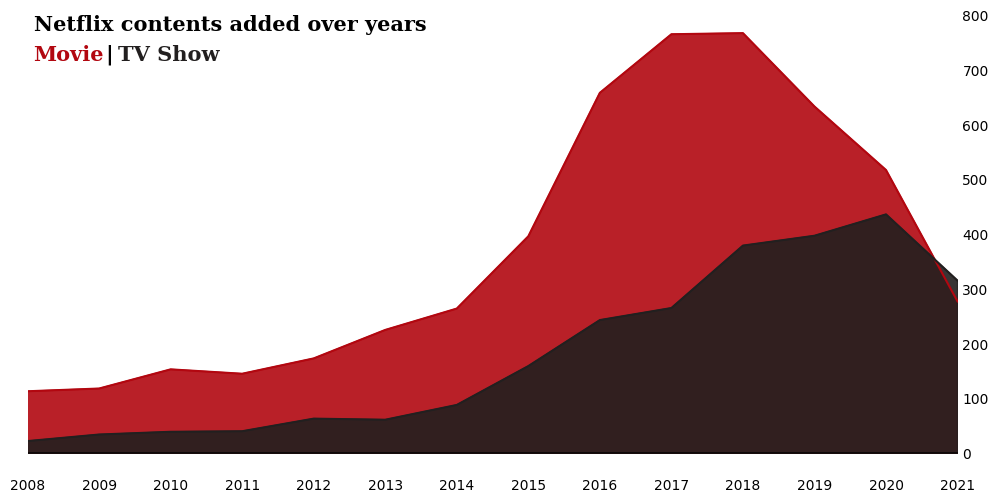

In [183]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]
for i, mtv in enumerate(netflix_years['type'].value_counts().index):
    mtv_rel = netflix_years[netflix_years['type']==mtv]['release_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2022, 1))

fig.text(0.13, 0.85, 'Netflix contents added over years', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.8,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.8,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('../Dashboard/Components/data/netflix_content_added_over_years.png')
plt.show()


# NETFLIX CONTENTS ADDED OVER YEARS [Cumulative]

In [184]:
netflix_years = netflix[['title', 'type', 'release_year']]
netflix_years.head(2)

,title,type,release_year
0,Dick Johnson Is Dead,Movie,2020
1,Blood & Water,TV Show,2021


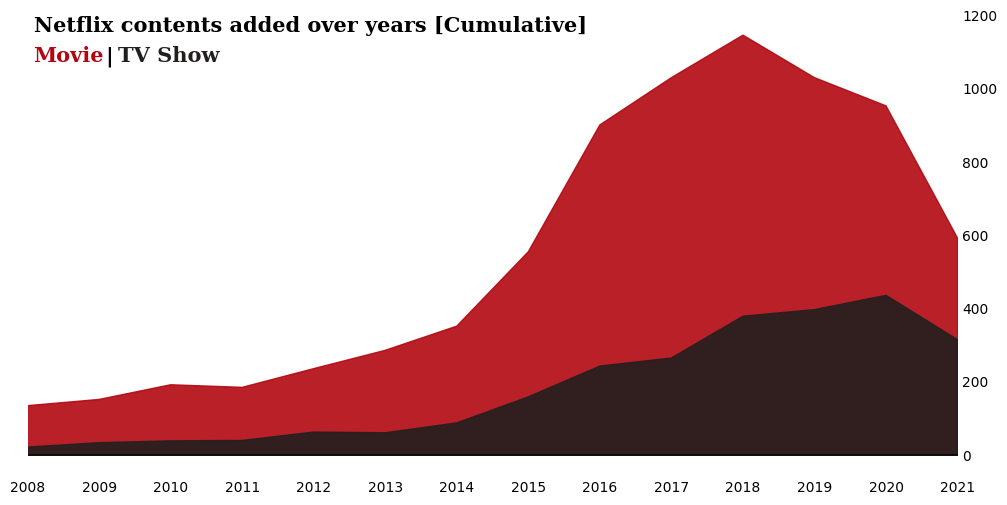

In [185]:
data_sub = netflix_years.groupby('type')['release_year'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_years['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2022, 1))

fig.text(0.13, 0.85, 'Netflix contents added over years [Cumulative]', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.13,0.8,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.8,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('../Dashboard/Components/data/netflix_content_added_over_years_cumulative.png')
plt.show()

# NETFLIX TARGET

In [186]:
netflix_target = netflix[['title', 'rating', 'country']]
netflix_target.head(2)

,title,rating,country
0,Dick Johnson Is Dead,PG-13,United States
1,Blood & Water,TV-MA,South Africa


In [187]:
netflix_target['count'] = 1

netflix_target['first_country'] = netflix_target['country'].apply(lambda x: x.split(",")[0])
netflix_target['first_country'].replace('United States', 'USA', inplace=True)
netflix_target['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_target['first_country'].replace('South Korea', 'S. Korea',inplace=True)


C:\Users\marco\AppData\Local\Temp\ipykernel_8948\1573845091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['count'] = 1
C:\Users\marco\AppData\Local\Temp\ipykernel_8948\1573845091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['first_country'] = netflix_target['country'].apply(lambda x: x.split(",")[0])
C:\Users\marco\AppData\Local\Temp\ipykernel_8948\1573845091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [188]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [189]:
netflix_target['target_ages'] = netflix_target['rating'].replace(ratings_ages)
netflix_target['target_ages'].unique()

C:\Users\marco\AppData\Local\Temp\ipykernel_8948\3093951697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_target['target_ages'] = netflix_target['rating'].replace(ratings_ages)


array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [190]:
data = netflix_target.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

df_heatmap = netflix_target.loc[netflix_target['first_country'].isin(data)]

C:\Users\marco\AppData\Local\Temp\ipykernel_8948\2523919034.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = netflix_target.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]


In [191]:
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

In [192]:
df_heatmap

first_country,Australia,Canada,France,India,Japan,Mexico,S. Korea,Spain,UK,USA
target_ages,,,,,,,,,,
Adults,0.460870,0.476015,0.622642,0.263889,0.354086,0.768657,0.440758,0.817680,0.523126,0.457703
Kids,0.147826,0.143911,0.084906,0.013889,0.011673,0.014925,0.042654,0.033149,0.081340,0.084346
Older Kids,0.234783,0.214022,0.103774,0.158730,0.256809,0.097015,0.118483,0.044199,0.177033,0.200695
Teens,0.156522,0.166052,0.188679,0.563492,0.377432,0.119403,0.398104,0.104972,0.218501,0.257256


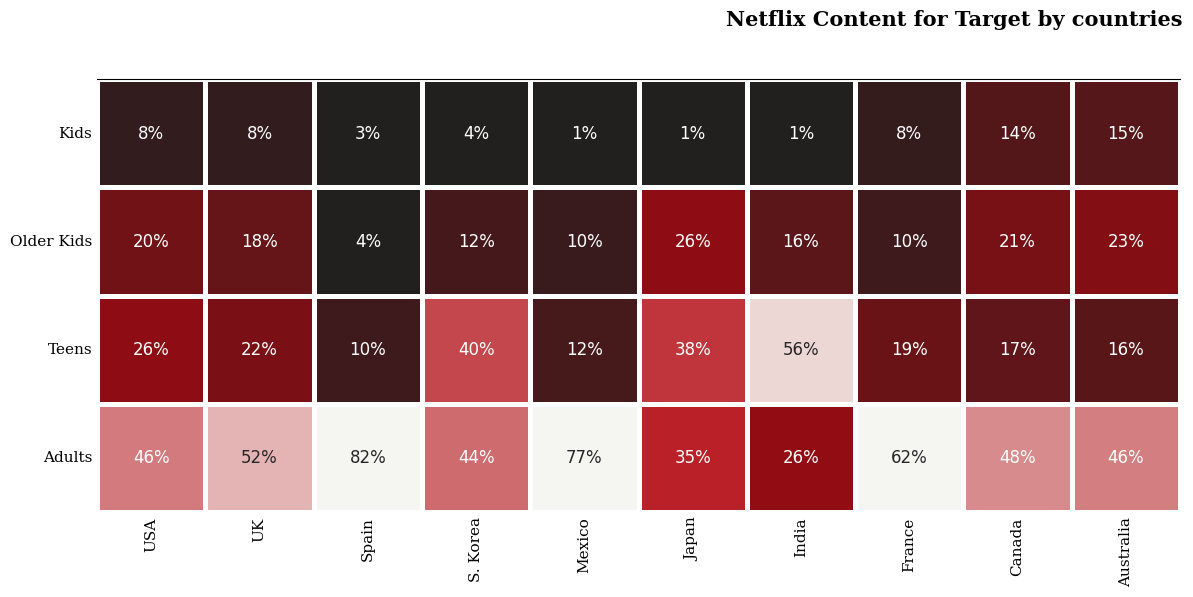

In [193]:
import seaborn as sns
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'UK', 'Spain', 'S. Korea', 'Mexico', 'Japan', 'India', 'France', 'Canada', 'Australia']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Netflix Content for Target by countries', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

plt.savefig('../Dashboard/Components/data/netflix_country_target.png')
plt.show()